# Murder victims

Uses data from the Crime in the US reports from 2008 until 2013.

## Caveats
0. No control variable, just using raw murder victim totals

## Working questions
0. Do men and women get murdered at different rates?
0. What age group is most often the victim of a murder?

In [1]:
%matplotlib inline
import glob
import pandas as pd

In [221]:
FILE_MAPPING = {
    '2000': 'cius_data/2000/table2-5_vicage00.xls', # https://ucr.fbi.gov/crime-in-the-u.s/2000
    '2001': 'cius_data/2001/table2-5_vicage01.xls', # https://ucr.fbi.gov/crime-in-the-u.s/2001
    '2002': 'cius_data/2002/table2-5_vicage02.xls', # https://ucr.fbi.gov/crime-in-the-u.s/2002
    '2003': 'cius_data/2003/table2-4_age03.xls', # https://ucr.fbi.gov/crime-in-the-u.s/2003/
    '2004': 'cius_data/2004/04tbl2-4a.xls', # https://www2.fbi.gov/ucr/cius_04/offenses_reported/violent_crime/murder.html
    '2005': 'cius_data/2005/05shrtab2.xls',
    '2006': 'cius_data/CIUS2006datatables/06shrtable2.xls',
    '2007': 'cius_data/CIUS2007datatables/07shrtbl2.xls',
    '2008': 'cius_data/CIUS2008datatables/08shrtbl02.xls',
    '2009': 'cius_data/CIUS2008datatables/08shrtbl02.xls',
    '2010': 'cius_data/CIUS2010datatables/10shrtbl02.xls',
    '2011': 'cius_data/CIUS2011datatables/SHR Tables 2011/Expanded_Homicide_Data_Table_2_Murder_Victims_by_Age_Sex_and_Race_2011.xls',
    '2012': 'cius_data/cius2012datatables/Expanded_Homicide_Data_Table_2_Murder_Victims_by_Age_Sex_and_Race_2012.xls',
    '2013': 'cius_data/cius2013datatables/Expanded_Homicide_Data_Table_2_Murder_Victims_by_Age_Sex_and_Race_2013.xls'
}

YEARS = ['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']

def count_by_year(year):
    file_path = FILE_MAPPING[year]
    raw = pd.read_excel(file_path)
    data = {
        'total': raw.loc[4][1],
        'male': raw.loc[4][2],
        'female': raw.loc[4][3],
        'unknown_sex': raw.loc[4][4],
        'white': raw.loc[4][5],
        'black': raw.loc[4][6],
        'other_race': raw.loc[4][7],
        'unknown_race': raw.loc[4][8],
        'under_1': raw.loc[9][1],
        '1_to_4': raw.loc[10][1],
        '5_to_8': raw.loc[11][1],
        '9_to_12': raw.loc[12][1],
        '13_to_16': raw.loc[13][1],
        '17_to_19': raw.loc[14][1],
        '20_to_24': raw.loc[15][1],
        '25_to_29': raw.loc[16][1],
        '30_to_34': raw.loc[17][1],
        '35_to_39': raw.loc[18][1],
        '40_to_44': raw.loc[19][1],
        '45_to_49': raw.loc[20][1],
        '50_to_54': raw.loc[21][1],
        '55_to_59': raw.loc[22][1],
        '60_to_64': raw.loc[23][1],
        '65_to_69': raw.loc[24][1],
        '70_to_74': raw.loc[25][1],
        '75_and_over': raw.loc[26][1],
        'unknown_age': raw.loc[27][1]
    }
    return pd.DataFrame([data], index=[year])

counts = pd.concat(map(count_by_year, YEARS))
totals = counts[['total']]
race = counts[['black', 'white', 'other_race', 'unknown_race']]
sex = counts[['male', 'female', 'unknown_sex']]
age_columns = ['under_1','1_to_4','5_to_8','9_to_12','13_to_16','17_to_19','20_to_24',
               '25_to_29','30_to_34','35_to_39','40_to_44','45_to_49','50_to_54','55_to_59',
               '60_to_64','65_to_69','70_to_74','75_and_over','unknown_age']
age = counts[age_columns]

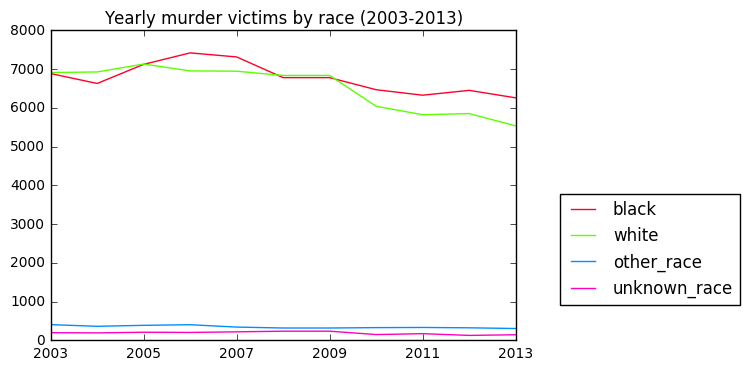

In [222]:
race.plot(colormap='gist_rainbow', title='Yearly murder victims by race (2003-2013)').legend(bbox_to_anchor=[1.5, .5])

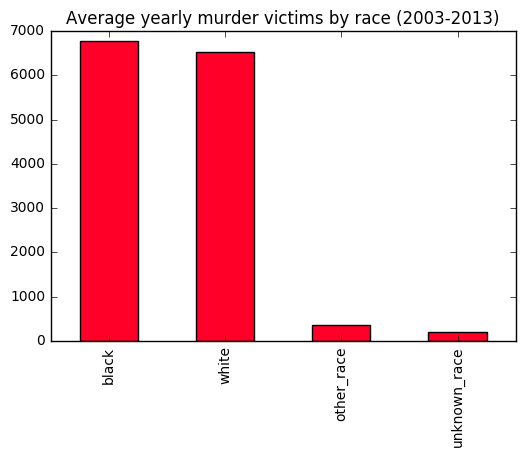

In [229]:
race.mean().plot(colormap='gist_rainbow', kind='bar', title='Average yearly murder victims by race (2003-2013)')

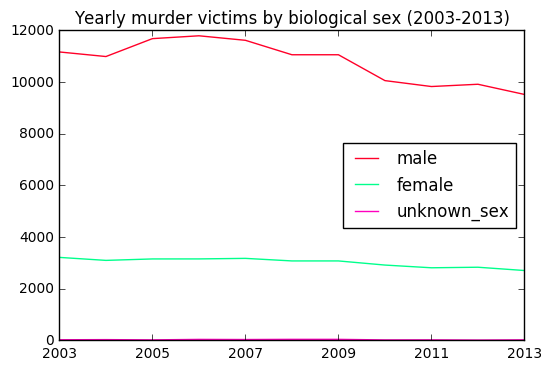

In [224]:
sex.plot(colormap='gist_rainbow', title='Yearly murder victims by biological sex (2003-2013)')

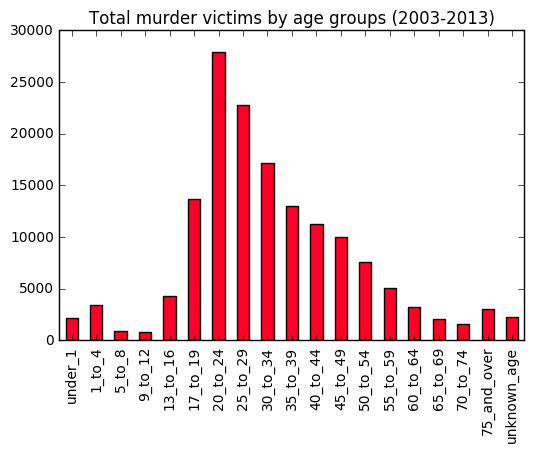

In [226]:
age.sum().plot(colormap='gist_rainbow', kind='bar', title='Total murder victims by age groups (2003-2013)')

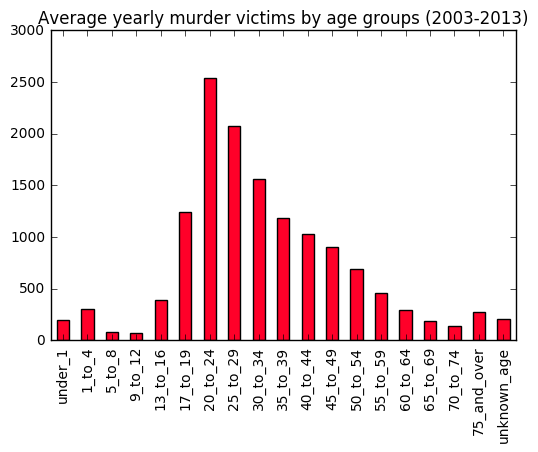

In [225]:
age.mean().plot(colormap='gist_rainbow', kind='bar', title='Average yearly murder victims by age groups (2003-2013)')

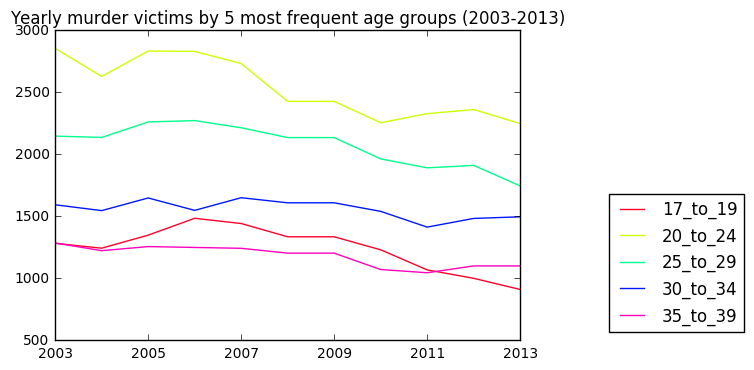

In [230]:
frequent_ages = counts[['17_to_19', '20_to_24', '25_to_29', '30_to_34', '35_to_39']]
frequent_ages.plot(colormap='gist_rainbow', title='Yearly murder victims by 5 most frequent age groups (2003-2013)').legend(bbox_to_anchor=[1.5, .5])